# Import package

In [2]:
!pip install -q U google-generativeai


In [11]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [34]:
def to_Markdown(test):
  test =test.replace('*'," ")
  return Markdown(textwrap.indent(test, '>', predicate=lambda _:True))

  #example usage
input_test ="This is a *sample text with bullet points."
result = to_Markdown(input_test)

display(result)

>This is a  sample text with bullet points.

In [13]:
# setup your api key
from google.colab import userdata


In [14]:
GOOGLE_API_KEY =userdata.get('GOOGLE_API_KEY')

In [15]:
genai.configure(api_key=GOOGLE_API_KEY)

In [17]:
for models in genai.list_models():
  print(models)

Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representation of a text.',
      input_token_limit=1024,
      output_token_limit=1,
      supported_generation_methods=['embedText', 'countTextTokens'],
      temperature=None,
      max_temperature=None,
      top_p=None,
      top_k=None)
Model(name='models/gemini-2.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 2.5 Flash',
      description=('Stable version of Gemini 2.5 Flash, our mid-size multimodal model that '
                   'supports up to 1 million tokens, released in June of 2025.'),
      input_token_limit=1048576,
      output_token_limit=65536,
      supported_generation_methods=['generateContent',
                                    'countTokens',
                                    'createCachedContent',
                                    'batchGenerateContent'],
     

In [18]:
for model in genai.list_models():
  if "generateContent" in model.supported_generation_methods:
    print(models.name)

models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-12-2025
models/gemini-2.5-flash-native-audio-preview-1

**Generate Test From Text Input**

In [30]:
model = genai.GenerativeModel('gemini-2.5-flash')

In [31]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 107 ms, sys: 12 ms, total: 119 ms
Wall time: 14.1 s


In [32]:
response.candidates

[content {
  parts {
    text: "That\'s the million-dollar question, and arguably the most profound one humanity has ever asked!\n\nThe short answer is: **There isn\'t a single, universally agreed-upon meaning of life.** It\'s a question that has been debated by philosophers, theologians, scientists, and everyday people for millennia, and the answer often depends on an individual\'s worldview, beliefs, and experiences.\n\nHere\'s a breakdown of common perspectives:\n\n1.  **The Absence of an Inherent Meaning (Nihilism/Absurdism):**\n    *   Some philosophies, like nihilism, suggest that life, the universe, and everything in it have no intrinsic meaning, purpose, or value. From this perspective, any meaning we perceive is something we project onto it.\n    *   Absurdism, famously articulated by Albert Camus, acknowledges this lack of inherent meaning but suggests that we can find value in the *struggle* against the absurd, in rebellion, freedom, and passion. The meaning comes from how w

In [33]:
response.text

'That\'s the million-dollar question, and arguably the most profound one humanity has ever asked!\n\nThe short answer is: **There isn\'t a single, universally agreed-upon meaning of life.** It\'s a question that has been debated by philosophers, theologians, scientists, and everyday people for millennia, and the answer often depends on an individual\'s worldview, beliefs, and experiences.\n\nHere\'s a breakdown of common perspectives:\n\n1.  **The Absence of an Inherent Meaning (Nihilism/Absurdism):**\n    *   Some philosophies, like nihilism, suggest that life, the universe, and everything in it have no intrinsic meaning, purpose, or value. From this perspective, any meaning we perceive is something we project onto it.\n    *   Absurdism, famously articulated by Albert Camus, acknowledges this lack of inherent meaning but suggests that we can find value in the *struggle* against the absurd, in rebellion, freedom, and passion. The meaning comes from how we choose to live in the face of

In [35]:
to_Markdown(response.text)

>That's the million-dollar question, and arguably the most profound one humanity has ever asked!
>
>The short answer is:   There isn't a single, universally agreed-upon meaning of life.   It's a question that has been debated by philosophers, theologians, scientists, and everyday people for millennia, and the answer often depends on an individual's worldview, beliefs, and experiences.
>
>Here's a breakdown of common perspectives:
>
>1.    The Absence of an Inherent Meaning (Nihilism/Absurdism):  
>        Some philosophies, like nihilism, suggest that life, the universe, and everything in it have no intrinsic meaning, purpose, or value. From this perspective, any meaning we perceive is something we project onto it.
>        Absurdism, famously articulated by Albert Camus, acknowledges this lack of inherent meaning but suggests that we can find value in the  struggle  against the absurd, in rebellion, freedom, and passion. The meaning comes from how we choose to live in the face of meaninglessness.
>
>2.    Meaning from a Higher Power/Divine Purpose (Theism):  
>        Many religions provide a clear framework for the meaning of life. For example:
>              Christianity:   To glorify God, love one another, and achieve salvation/eternal life through faith in Jesus Christ.
>              Islam:   To submit to the will of Allah, live righteously according to the Quran and the Sunnah, and prepare for the afterlife.
>              Judaism:   To honor God's covenant, follow the Mitzvot (commandments), and contribute to Tikkun Olam (repairing the world).
>              Hinduism:   To achieve moksha (liberation from the cycle of rebirth) through dharma (righteous conduct), karma (action), and various spiritual paths.
>              Buddhism:   To alleviate suffering (dukkha) and achieve enlightenment (nirvana) through understanding and eliminating craving and attachment.
>        In these views, meaning is divinely ordained and often involves moral conduct, spiritual growth, and a purpose that extends beyond earthly existence.
>
>3.    Meaning Through Humanism/Creating Our Own Meaning (Existentialism):  
>        Many secular philosophies argue that meaning isn't given but  created  by individuals.
>          Existentialism   (Sartre, de Beauvoir) posits that "existence precedes essence." We are born without a predefined purpose, and it is up to us to define ourselves through our choices, actions, and values. We are "condemned to be free" and must take responsibility for creating our own meaning.
>          Humanism   generally focuses on human flourishing, reason, ethics, and justice. Meaning is found in contributing to the well-being of humanity, fostering compassion, pursuing knowledge, and appreciating beauty.
>
>  Common Themes for Self-Created Meaning:  
>
>Even within the "create your own meaning" framework, several themes frequently emerge as sources of purpose and fulfillment for individuals:
>
>      Relationships:   Love, family, friendship, community, connection with others.
>      Contribution & Legacy:   Making a positive impact on the world, helping others, leaving something behind that benefits future generations.
>      Growth & Learning:   Personal development, acquiring knowledge, mastering skills, exploring new ideas and experiences.
>      Creativity & Expression:   Art, music, writing, innovation, bringing new things into existence.
>      Experiencing Beauty & Awe:   Appreciating nature, art, music, and the wonders of the universe.
>      Purpose & Cause:   Dedicating oneself to a belief, a movement, a job, or a mission that feels significant.
>      Happiness & Fulfillment:   While not identical to meaning, a life filled with joy, contentment, and a sense of accomplishment is often considered meaningful.
>
>  In summary:  
>
>The "meaning of life" is less of a factual answer and more of an ongoing personal quest. It's about what you choose to value, what you dedicate your energy to, and what gives your existence a sense of purpose, significance, and worth. For many, the very act of searching for and defining that meaning is a central part of life itself.

In [37]:
response.prompt_feedback

In [39]:
%%time
response = model.generate_content("what is the meaning of life", stream=True)
for chunk in response:
  print(chunk.text)
  print("_"*80)

This is arguably the most profound and enduring question humanity has ever pondered, and the most honest answer is: **there isn't one single, universally agreed-upon definition.**

The "meaning of life" is not a fixed truth waiting
________________________________________________________________________________
 to be discovered like a scientific law. Instead, it's a concept that is deeply personal, philosophical, and often spiritual.

Here's a breakdown of common ways people approach the meaning of life:

1.  **There
________________________________________________________________________________
 is no inherent meaning (Nihilism/Absurdism):**
    *   **Nihilism:** Proponents believe that life has no intrinsic meaning, purpose, or value. From a cosmic perspective, our individual lives
________________________________________________________________________________
 are insignificant.
    *   **Absurdism:** Acknowledges the lack of inherent meaning but encourages us to embrace this "ab

In [41]:
# generate text from imagge
!curl -o image.jpg https://images.unsplash.com/photo-1761839259488-2bdeeae794f5?w=1000&auto=format&fit=crop&q=60&ixlib=rb-4.1.0&ixid=M3wxMjA3fDF8MHxmZWF0dXJlZC1waG90b3MtZmVlZHwxfHx8ZW58MHx8fHx8

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  180k  100  180k    0     0  92318      0  0:00:02  0:00:02 --:--:-- 92352


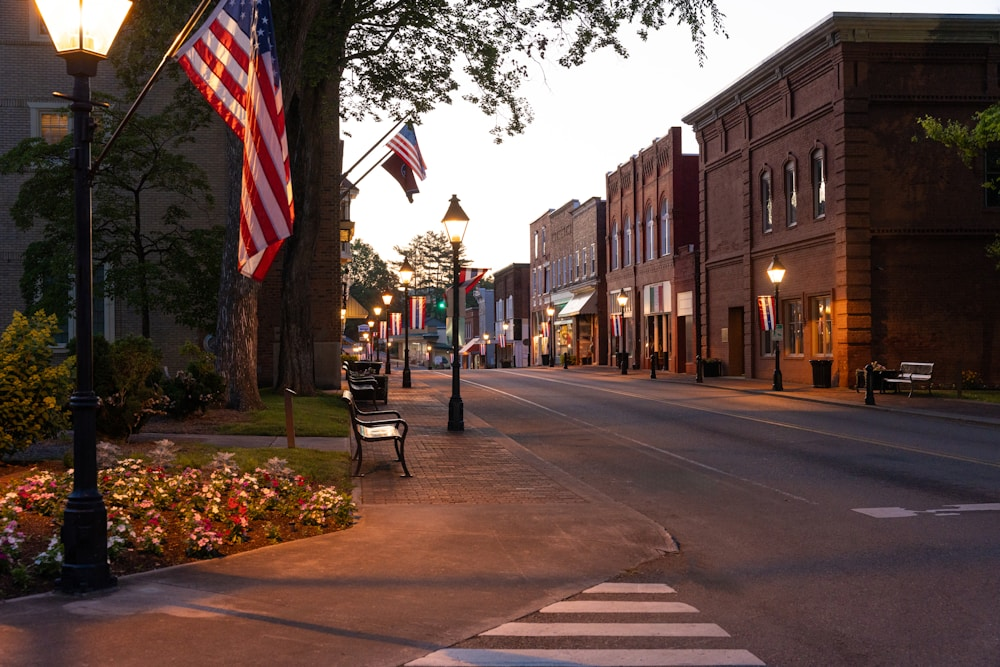

In [42]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [43]:
response = model.generate_content(img)

In [44]:
response.text

"Based on the visual evidence, the location shown in the image is **Jonesborough, Tennessee**.\n\nHere's the reasoning:\n1.  **Flags:** The image clearly displays multiple American flags. More importantly, a smaller flag further down the street (visible in the second crop, top right) is distinctly the **Tennessee state flag**, identifiable by its red field, blue vertical stripe, and three stars within a white circle. This strongly suggests the location is within Tennessee.\n2.  **Architecture:** The buildings are primarily historic brick structures, typical of a well-preserved late 19th or early 20th-century American downtown.\n3.  **Street Scene:** The street features ornate lampposts, benches, well-maintained flower beds, and a clean, historic feel. The time of day appears to be dusk or dawn, with the streetlights illuminated.\n4.  **Specific Town Identification:** By searching for historic downtowns in Tennessee with these characteristics, particularly those known for their preserva

In [45]:
to_Markdown(response.text)

>Based on the visual evidence, the location shown in the image is   Jonesborough, Tennessee  .
>
>Here's the reasoning:
>1.    Flags:   The image clearly displays multiple American flags. More importantly, a smaller flag further down the street (visible in the second crop, top right) is distinctly the   Tennessee state flag  , identifiable by its red field, blue vertical stripe, and three stars within a white circle. This strongly suggests the location is within Tennessee.
>2.    Architecture:   The buildings are primarily historic brick structures, typical of a well-preserved late 19th or early 20th-century American downtown.
>3.    Street Scene:   The street features ornate lampposts, benches, well-maintained flower beds, and a clean, historic feel. The time of day appears to be dusk or dawn, with the streetlights illuminated.
>4.    Specific Town Identification:   By searching for historic downtowns in Tennessee with these characteristics, particularly those known for their preservation and display of state flags, Jonesborough, Tennessee, emerges as a strong candidate. Jonesborough is recognized as Tennessee's oldest town and is famous for its historic district. Visual comparisons with images of Main Street in Jonesborough, Tennessee, confirm the match, including the architectural style of the brick buildings, the specific type of lampposts, and the overall ambiance of the street.

In [46]:
response =model.generate_content(["Write a short, engagaing blog post baset on this picture. It should include a discription of it"])

In [ ]:
response.resolve()

In [47]:
response.text

"Okay, imagine the picture shows a **solitary, ancient, gnarled tree silhouetted against a breathtaking sunset (or sunrise). The sky is a dramatic canvas of deep oranges, purples, and fading blues, with the sun's fiery glow just visible on the horizon, creating a stunning halo around the tree.**\n\n---\n\n## The Lone Sentinel: A Portrait of Resilience\n\nJust look at this image. Isn't it a breathtaking reminder of nature's quiet power?\n\nHere, we see a **magnificent, solitary tree, its ancient, gnarled branches reaching like weathered arms towards the vast expanse of the sky.** It stands proud, a dark, intricate silhouette against a stunning backdrop. The **sun, either rising or setting, paints the horizon in a dramatic symphony of deep oranges, fiery reds, and soft purples, fading into serene blues overhead.** The tree itself seems to absorb the last (or first) golden light, creating a beautiful, almost spiritual glow around its majestic form.\n\nIt's more than just a beautiful lands

In [48]:
to_Markdown(response.text)

>Okay, imagine the picture shows a   solitary, ancient, gnarled tree silhouetted against a breathtaking sunset (or sunrise). The sky is a dramatic canvas of deep oranges, purples, and fading blues, with the sun's fiery glow just visible on the horizon, creating a stunning halo around the tree.  
>
>---
>
>## The Lone Sentinel: A Portrait of Resilience
>
>Just look at this image. Isn't it a breathtaking reminder of nature's quiet power?
>
>Here, we see a   magnificent, solitary tree, its ancient, gnarled branches reaching like weathered arms towards the vast expanse of the sky.   It stands proud, a dark, intricate silhouette against a stunning backdrop. The   sun, either rising or setting, paints the horizon in a dramatic symphony of deep oranges, fiery reds, and soft purples, fading into serene blues overhead.   The tree itself seems to absorb the last (or first) golden light, creating a beautiful, almost spiritual glow around its majestic form.
>
>It's more than just a beautiful landscape; it's a powerful metaphor for life itself. This majestic tree has surely weathered countless storms, embraced untold sunsets, and stood steadfast through changing seasons. Yet, it remains – a testament to quiet strength and unyielding resilience.
>
>In a world that often demands constant connection, this lone sentinel reminds us of the beauty in standing firm, rooted in who we are, even when we feel entirely on our own. It's a symbol of endurance, a silent observer of time, and a beacon of hope against the ever-changing sky.
>
>What does this 'lone sentinel' inspire in you? Where do you find your strength when the world feels vast and challenging? Share your thoughts below!
>
>Let this image be a beautiful reminder that standing tall, rooted in who you are, is a magnificent act of defiance and grace.